In [186]:
from cvxpy import *
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [211]:
number_teams = 32
number_matchups = number_teams//2

In [212]:
game_values = np.random.randint(1000, size=(number_teams, number_teams))

In [213]:
installed_solvers()

['ECOS', 'ECOS_BB', 'OSQP', 'SCS']

In [214]:
#Declare variables
C = Variable(shape = (number_teams,number_teams), boolean = True)
#V = Constant(game_values)

In [215]:
constr = [
          sum(C, axis=0) <= 1,
          sum(C, axis=1) <= 1,
          sum(C) == number_matchups,
]

In [216]:
for i in range(number_teams):
    constr += [sum(C[:,i] + C[i,:]) == 1,]
    constr += [C[i,i] == 0,]

In [217]:
#Define the Optimization Problem
t1 = time.time()

prob = Problem(Maximize(sum(multiply(C, game_values))),
              
              constr
              
              )

prob.solve(
            verbose = False,
            solver = ECOS_BB,
            #mi_max_iters = 10000
)

t2 = time.time()

<AxesSubplot:>

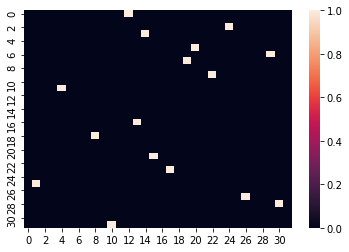

In [218]:
sns.heatmap(C.value > 0.1)

In [74]:
sum(game_values, axis=0)

Expression(CONSTANT, NONNEGATIVE, (3,))

In [79]:
game_values.sum(axis=1) + game_values.sum(axis=0)

array([2936, 2936, 3600])